# 3- EDA (Statistical Analysis)
This section will further analyze our wrangle datasets by using descriptive statistics and some frequentist tests.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [2]:
loan_data=pd.read_csv("C:\\Users\\yfawz\\OneDrive\\Desktop\\load_default_prediction\\data\\processed\\loan_wrangled.csv", low_memory=False, index_col=0)

C:\Users\yfawz\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,...,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,N,Cash,N
1,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,...,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,N,Cash,N
2,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,...,0.0,0.0,0.0,136927.0,11749.0,13800.0,10000.0,N,Cash,N
3,4000,4000,4000.0,36 months,18.94,146.51,D,D2,IT Supervisor,10+ years,...,100.0,0.0,0.0,385183.0,36151.0,5000.0,44984.0,N,Cash,N
4,30000,30000,30000.0,60 months,16.14,731.78,C,C4,Mechanic,10+ years,...,0.0,0.0,0.0,157548.0,29674.0,9300.0,32332.0,N,Cash,N


Some of the hypothesis that will be done in this notebook will aim to compare 2 sets and whether they have idential distributions and will follow the same computational path and therefore we will write functions to ease this analysis.

In order to compare 2 different distributions and see if they are similar is to conduct a hypotheis test with permutations which is using the following functions:

The first function will:

- 1. Combine the 2 datasets together
- 2. Randomly scramble the data so that the original order is lost. 
- 3. Divide the scramble data into 2 portions. Each portion is the same length as the original. Except now they are from the scrambled set.
- 4. The function returns 2 permutated samples of the scrambled data

The second function will:
- 1. Draw permutated samples using the first function.
- 2. Apply a pre-defined function taking the 2 sets as inputs and returns a permutated replicate.(In this scenario the function will be the difference of means which will be our 3rd function.
- 3. There will be a 'size' argument which will be the number of iterations(# of replicates) to be returned by the function. 

The third funtion will:
- 1. Return the difference of means between two datasets.

A combination of these 3 funtions will return one array of permutated replicates(difference of means) which can be used to test the observed difference against the replicates to complete the hypothesis test.

The p-value which is the probability of observing a test statistic equally or more extreme than the one observed, given that the null hypothesis is true.

In [95]:
def permutation_sample(set_1, set_2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((set_1, set_2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(set_1)]
    perm_sample_2 = permuted_data[-len(set_2):]

    return perm_sample_1, perm_sample_2

In [127]:
# Defining function to return permutaed samples depending on function
def draw_perm_reps(set_1, set_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_reps = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(set_1,set_2)

        # Compute the test statistic
        perm_reps[i] = func(perm_sample_1, perm_sample_2)

    return perm_reps

In [128]:
def diff_of_means(set_1, set_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(set_1) - np.mean(set_2)
    
    return diff

# 1. Do mortgage holders have a similar interest rate distribution as those who rent their homes?

## Null Hypothesis: Mortgage Holders and Renters receive have the same interest rate distribution.

In [129]:
#Filtering Mortgage Data
mortgage_data=loan_data[loan_data.home_ownership == 'MORTGAGE']

#Filterting Renter data
renter_data=loan_data[loan_data.home_ownership == 'RENT']

#filtering interest rates
ir_mortgage=mortgage_data['int_rate']
ir_renter=renter_data['int_rate']

In [122]:
# Compute difference of mean interest rates observed in the data
ir_empirical_diff_means = diff_of_means(ir_mortgage,ir_renter)

ir_empirical_diff_means

-0.7666776970587161

The observed difference of means between mortgage holders and renters is -0.77%. Let's run our functions.

In [ ]:
# Draw 2,000 permutation replicates: perm_replicates
perm_reps = draw_perm_reps(ir_mortgage, ir_renter, diff_of_means, size=200)

# Compute p-value: p
p = np.sum(perm_reps >= empirical_diff_means) / len(perm_reps)

# Print the result
print('p-value =', p)

In [126]:
perm_reps

array([1.21176352e-311, 1.21177798e-311, 1.21177783e-311, 1.21177783e-311,
       1.21177783e-311, 1.21177783e-311, 1.21177803e-311, 1.21177803e-311,
       1.21177803e-311, 1.21177803e-311, 1.21177803e-311, 1.21177803e-311,
       1.21177803e-311, 1.21177803e-311, 1.21177803e-311, 1.21177803e-311,
       1.21177803e-311, 1.21177803e-311, 1.21177803e-311, 1.21177803e-311,
       1.21177803e-311, 1.21177803e-311, 1.21177803e-311, 1.21177803e-311,
       1.21177803e-311, 1.21177803e-311, 1.21177803e-311, 1.21177803e-311,
       1.21177803e-311, 1.21177803e-311, 1.21177803e-311, 1.21177803e-311,
       1.21177803e-311, 1.21177803e-311, 1.21177803e-311, 1.21177803e-311,
       1.21177803e-311, 1.21177803e-311, 1.21177803e-311, 1.21177803e-311,
       1.21177803e-311, 1.21177803e-311, 1.21177803e-311, 1.21177803e-311,
       1.21177803e-311, 1.21177803e-311, 1.21177803e-311, 1.21177803e-311,
       1.21177803e-311, 1.21177803e-311, 1.21177805e-311, 1.21177805e-311,
       1.21177805e-311, 1

In [125]:
np.min(perm_reps)

1.21176351918e-311

C:\Users\yfawz\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: overflow encountered in double_scalars
  norm = n_equal_bins / _unsigned_subtract(last_edge, first_edge)
C:\Users\yfawz\Anaconda3\lib\site-packages\numpy\lib\histograms.py:853: RuntimeWarning: invalid value encountered in multiply
  f_indices = _unsigned_subtract(tmp_a, first_edge) * norm


IndexError: index -9223372036854775808 is out of bounds for axis 0 with size 31

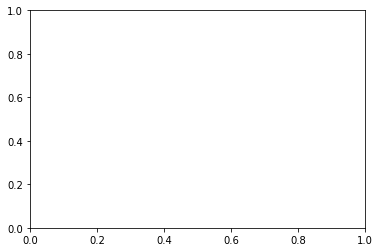

In [124]:
plt.hist(perm_reps, bins=30)

## Null Hypothesis: Mortgage holders have an equal or higher mean interest rate distribution than renters.

TO test the above hypothesis, this can be done by:

- 1 - Combining the mortgage and renter interest rate series into one.
- 2- Finding the combined mean.
- 3- Shifting the mean of the mortgage and renter dataset to have the same value as the combined mean
- 4- Bootstrap replicates of the mean for each home by bootstrapping samples 10,000 times.
- 5- Find the difference of the boostrapped mean replicates.
- 6- Find the observed difference of the actual means.
- 7- Test the observed differences against the observed difference by counting the number of boostrapped replicates that are equal to or greater than the observed difference.
- 8- Divide the count by the length of the array to obtain the p-value.
- 9- For a 95% confidence interval, if th p-value is less than 0.05, we shall reject the null hypothesis

In [69]:
#finding means
ir_mortgage_mean=np.mean(ir_mortgage)
ir_renter_mean=np.mean(ir_renter)

#combining dataset and mean
ir_combined = np.concatenate((ir_mortgage,ir_renter))
ir_combined_mean=np.mean(ir_combined)

#computing difference of observed means
ir_mean_diff = ir_mortgage_mean - ir_renter_mean

In [8]:
#shifting means to obtain the same mean 
ir_shift_mean_mortgage = ir_mortgage -np.mean(ir_mortgage) + ir_combined_mean
ir_shift_mean_renter = ir_renter -np.mean(ir_renter) + ir_combined_mean

In [9]:
#bootstrapping means
ir_bsm_reps_mortgage = np.empty(2000)
ir_bsm_reps_renter = np.empty(2000)
for i in range(0,2000):
    ir_bsm_reps_mortgage[i] = np.mean(np.random.choice(ir_shift_mean_mortgage, len(ir_shift_mean_mortgage)))

for i in range(0,2000):
    ir_bsm_reps_renter[i] = np.mean(np.random.choice(ir_shift_mean_renter, len(ir_shift_mean_renter)))

In [10]:
#computing difference of bootstrapped means
ir_bsm_diff_of_means = ir_bsm_reps_mortgage - ir_bsm_reps_renter

In [11]:
#computing p-value
p = (np.sum(ir_bsm_diff_of_means >= ir_mean_diff) + np.sum(ir_bsm_diff_of_means <= ir_mean_diff))/len(ir_bsm_diff_of_means)
p*100

100.0

In [13]:
np.sum(ir_bsm_diff_of_means > ir_mean_diff)

2000

We see that out of the 2000 replicates, all of them are greater than the observed difference giving a p-value of 1. This means that we fail to reject the null hypothesis. Let's visualize.

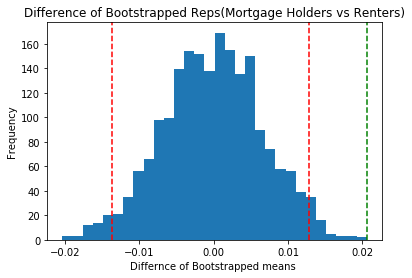

In [16]:
#plotting histogram of difference of boostrapped repplicates of mean
plt.hist(ir_bsm_diff_of_means, bins=30)

plt.axvline(x=np.percentile(ir_bsm_diff_of_means,(p)*100),color='g',linestyle='--')
plt.axvline(x=np.percentile(ir_bsm_diff_of_means,2.5),color='red',linestyle='--')
plt.axvline(x=np.percentile(ir_bsm_diff_of_means,97.5),color='red',linestyle='--')
plt.xlabel("Differnce of Bootstrapped means ")
plt.title("Difference of Bootstrapped Reps(Mortgage Holders vs Renters)")
plt.ylabel("Frequency");

# 2. Do mortgage holders have than an identical distribution of loans vs those who rent their homes?

This questions is best answered using a permutation test. This will be done using the following steps:

1. Combing the mortgage loan amounts with renter loan amounts
2. Randomly scramble the loan amounts (Assuming there are no differences between the 2 datasets.



In [55]:
#filtering and combining interest rates
loan_mortgage=mortgage_data['int_rate']
loan_renter=renter_data['int_rate']
loan_combined = np.concatenate((loan_mortgage,loan_renter))
empirical_diff_means = np.mean(loan_mortgage) - np.mean(loan_renter)

In [56]:
loan_perm_sample=np.random.permutation(loan_combined)

In [57]:
perm_sample_mortgage=loan_perm_sample[:len(loan_mortgage)]
perm_sample_renters=loan_perm_sample[-len(loan_renter):]

In [58]:
np.mean(perm_sample_mortgage)-np.mean(perm_sample_renters)

0.007146636177607135

In [59]:
perm_replicates = np.empty(5000)
for i in range(5000):
        # Compute the test statistic
        
        perm_sample_mortgage=loan_perm_sample[:len(loan_mortgage)]
        perm_sample_renters=loan_perm_sample[-len(loan_renter):]
        
        loan_combined = np.concatenate((loan_mortgage,loan_renter))
        perm_replicates[i] = np.mean(perm_sample_mortgage) - np.mean(perm_sample_renters)

In [60]:
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

In [62]:
p

1.0

In [17]:
#filtering interest rates
loan_mortgage=mortgage_data['loan_amnt']
loan_renter=renter_data['loan_amnt']

In [18]:
#finding means
loan_mortgage_mean=np.mean(loan_mortgage)
loan_renter_mean=np.mean(loan_renter)

#combining dataset and mean
loan_combined = np.concatenate((loan_mortgage,loan_renter))
loan_combined_mean=np.mean(loan_combined)

#computing difference of observed means
loan_mean_diff = loan_mortgage_mean - loan_renter_mean

In [19]:
#shifting means to obtain the same mean 
loan_shift_mean_mortgage = loan_mortgage -np.mean(loan_mortgage) + loan_combined_mean
loan_shift_mean_renter = loan_renter -np.mean(loan_renter) + loan_combined_mean

In [20]:
#bootstrapping means
loan_bsm_reps_mortgage = np.empty(2000)
loan_bsm_reps_renter = np.empty(2000)
for i in range(0,2000):
    loan_bsm_reps_mortgage[i] = np.mean(np.random.choice(loan_shift_mean_mortgage, len(loan_shift_mean_mortgage)))

for i in range(0,2000):
    loan_bsm_reps_renter[i] = np.mean(np.random.choice(loan_shift_mean_renter, len(loan_shift_mean_renter)))

In [21]:
#computing difference of bootstrapped means
loan_bsm_diff_of_means = loan_bsm_reps_mortgage - loan_bsm_reps_renter

In [22]:
#computing p-value
p = np.sum(loan_bsm_diff_of_means > loan_mean_diff)/len(loan_bsm_diff_of_means)
p*100

0.0

We see that out of the 2000 replicates, none of them are greater than the observed difference giving a p-value of 0. This means that we fail to reject the null hypothesis. Let's visualize.

In [23]:
#plotting histogram of difference of boostrapped repplicates of mean
plt.hist(bsm_diff_of_means, bins=30)

plt.axvline(x=np.percentile(bsm_diff_of_means,(p)*100),color='g',linestyle='--')
plt.axvline(x=np.percentile(bsm_diff_of_means,2.5),color='red',linestyle='--')
plt.axvline(x=np.percentile(bsm_diff_of_means,97.5),color='red',linestyle='--')
plt.xlabel("Differnce of Bootstrapped means ")
plt.title("Differfence of Bootstrapped Reps(Mortgage Holders vs Renters)")
plt.ylabel("Frequency");

NameError: name 'bsm_diff_of_means' is not defined

# 2. Does interest rate affect Loan Status (Late vs Current)?

## Null Hypothesis:

In [4]:
loan_data.loan_status.unique()

array(['Current', 'Fully Paid', 'Late (31-120 days)', 'In Grace Period',
       'Charged Off', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [5]:
list_late_status=[
             'Late (31-120 days)',
             'In Grace Period',
             'Charged Off',
             'Late (16-30 days)', 
             'Default',
             'Does not meet the credit policy. Status:Charged Off'
            ]

In [6]:
list_good_status=[
    'Current', 
    'Fully Paid',
    'Does not meet the credit policy. Status:Fully Paid'
]

In [8]:
loan_late=loan_data[loan_data.loan_status.isin(list_late_status)]['int_rate']
loan_good=loan_data[loan_data.loan_status.isin(list_good_status)]['int_rate']

In [11]:
#finding means
loan_late_mean=np.mean(loan_late)
loan_good_mean=np.mean(loan_good)

#combining dataset and mean
all_loans_combined = np.concatenate((loan_late,loan_good))
all_loans_combined_mean=np.mean(all_loans_combined)

#computing difference of observed means
all_loans_mean_diff = loan_late_mean - loan_good_mean

In [13]:
#shifting means to obtain the same mean 
loan_shift_mean_late = loan_late -np.mean(loan_late) + all_loans_combined_mean
loan_shift_mean_good = loan_late -np.mean(loan_good) + all_loans_combined_mean

In [14]:
#bootstrapping means
loan_bsm_reps_late = np.empty(2000)
loan_bsm_reps_good = np.empty(2000)
for i in range(0,2000):
    loan_bsm_reps_late[i] = np.mean(np.random.choice(loan_shift_mean_late, len(loan_shift_mean_late)))

for i in range(0,2000):
    loan_bsm_reps_good[i] = np.mean(np.random.choice(loan_shift_mean_good, len(loan_shift_mean_good)))

In [15]:
#computing difference of bootstrapped means
all_loans_bsm_diff_of_means = loan_bsm_reps_late - loan_bsm_reps_good

In [18]:
#computing p-value
p = np.sum(all_loans_bsm_diff_of_means > all_loans_mean_diff)/len(all_loans_bsm_diff_of_means)
p*100

0.0

In [20]:
np.sum(all_loans_bsm_diff_of_means > all_loans_mean_diff)/len(all_loans_bsm_diff_of_means)

0.0

We see that out of the 2000 replicates, none of them are greater than the observed difference giving a p-value of 0. This means that we fail to reject the null hypothesis. Let's visualize.

In [19]:
#plotting histogram of difference of boostrapped repplicates of mean
plt.hist(bsm_diff_of_means, bins=30)

plt.axvline(x=np.percentile(bsm_diff_of_means,(p)*100),color='g',linestyle='--')
plt.axvline(x=np.percentile(bsm_diff_of_means,2.5),color='red',linestyle='--')
plt.axvline(x=np.percentile(bsm_diff_of_means,97.5),color='red',linestyle='--')
plt.xlabel("Differnce of Bootstrapped means ")
plt.title("Differfence of Bootstrapped Reps(Mortgage Holders vs Renters)")
plt.ylabel("Frequency");

NameError: name 'bsm_diff_of_means' is not defined

# 3. 

# 4. 